# Electicity Demand

We will explore Electicity Demand dataset.

Based on this exploratory analysis, we will answer some question related to the data :
- How electricity demand over time?
- Is the electricity demand correlated with another variable?
- Are there any seasonal pattern in electricity demand?

### **Read Data**

In [1]:
import pandas as pd

elec_demand = pd.read_csv('NEMPRICEANDDEMAND_NSW1_202406182230.csv')
elec_demand.head()

,Settlement Date,Spot Price ($/MWh),Scheduled Demand (MW),Scheduled Generation (MW),Semi Scheduled Generation (MW),Net Import (MW),Type
0,17/06/2024 22:35,212.77079,9311.24,8370.40503,283.97497,-647.41,ACTUAL
1,17/06/2024 22:40,212.36309,9309.36,8272.88241,287.36759,-742.20,ACTUAL
2,17/06/2024 22:45,212.85130,9168.77,8204.06446,299.49554,-661.56,ACTUAL
3,17/06/2024 22:50,213.89878,9203.84,8202.46476,299.25524,-696.86,ACTUAL
4,17/06/2024 22:55,194.83811,9148.42,8202.41152,296.48848,-641.66,ACTUAL


In [2]:
# Show data info
elec_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Settlement Date                 347 non-null    object 
 1   Spot Price ($/MWh)              347 non-null    float64
 2   Scheduled Demand (MW)           347 non-null    float64
 3   Scheduled Generation (MW)       347 non-null    float64
 4   Semi Scheduled Generation (MW)  347 non-null    float64
 5   Net Import (MW)                 347 non-null    float64
 6   Type                            347 non-null    object 
dtypes: float64(5), object(2)
memory usage: 19.1+ KB


The `Settlement Date` columns is still in object format. We need to convert it to datetime.

In [3]:
elec_demand['Settlement Date'] = pd.to_datetime(elec_demand['Settlement Date'])
elec_demand.head()

/tmp/ipykernel_258877/3176958897.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  elec_demand['Settlement Date'] = pd.to_datetime(elec_demand['Settlement Date'])


,Settlement Date,Spot Price ($/MWh),Scheduled Demand (MW),Scheduled Generation (MW),Semi Scheduled Generation (MW),Net Import (MW),Type
0,2024-06-17 22:35:00,212.77079,9311.24,8370.40503,283.97497,-647.41,ACTUAL
1,2024-06-17 22:40:00,212.36309,9309.36,8272.88241,287.36759,-742.20,ACTUAL
2,2024-06-17 22:45:00,212.85130,9168.77,8204.06446,299.49554,-661.56,ACTUAL
3,2024-06-17 22:50:00,213.89878,9203.84,8202.46476,299.25524,-696.86,ACTUAL
4,2024-06-17 22:55:00,194.83811,9148.42,8202.41152,296.48848,-641.66,ACTUAL


In [4]:
elec_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Settlement Date                 347 non-null    datetime64[ns]
 1   Spot Price ($/MWh)              347 non-null    float64       
 2   Scheduled Demand (MW)           347 non-null    float64       
 3   Scheduled Generation (MW)       347 non-null    float64       
 4   Semi Scheduled Generation (MW)  347 non-null    float64       
 5   Net Import (MW)                 347 non-null    float64       
 6   Type                            347 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 19.1+ KB


What can we observe from the data?

In [5]:
elec_demand

,Settlement Date,Spot Price ($/MWh),Scheduled Demand (MW),Scheduled Generation (MW),Semi Scheduled Generation (MW),Net Import (MW),Type
0,2024-06-17 22:35:00,212.77079,9311.24,8370.40503,283.97497,-647.41,ACTUAL
1,2024-06-17 22:40:00,212.36309,9309.36,8272.88241,287.36759,-742.20,ACTUAL
2,2024-06-17 22:45:00,212.85130,9168.77,8204.06446,299.49554,-661.56,ACTUAL
3,2024-06-17 22:50:00,213.89878,9203.84,8202.46476,299.25524,-696.86,ACTUAL
4,2024-06-17 22:55:00,194.83811,9148.42,8202.41152,296.48848,-641.66,ACTUAL
...,...,...,...,...,...,...,...
342,2024-06-20 02:00:00,283.96000,8338.62,7112.06600,477.28400,-736.19,FORECAST
343,2024-06-20 02:30:00,291.67420,8092.61,6956.27000,474.93000,-647.77,FORECAST
344,2024-06-20 03:00:00,283.96000,7899.09,6732.31000,470.49000,-676.98,FORECAST
345,2024-06-20 03:30:00,265.73000,7766.33,6641.01700,464.53300,-642.67,FORECAST


Data Definitions : 
- **Settlement Date**: The date and time when the electricity demand and other related metrics were recorded.
- **Spot Price ($/MWh)**: The price of electricity in dollars per megawatt-hour at the time of settlement.
- **Scheduled Demand (MW)**: The amount of electricity demand scheduled in megawatts.
- **Scheduled Generation (MW)**: The amount of electricity generation scheduled in megawatts.
- **Semi Scheduled Generation (MW)**: The amount of electricity generation from semi-scheduled sources in megawatts.
- **Net Import (MW)**: The net amount of electricity imported in megawatts.
- **Type**: The type of data, indicating whether it is actual recorded data or forecasted data.

Info :
- We can see that the data is from `2024-06-17 22:35:00` to `2024-06-20 04:00:00`

### **Plot**

- First thing to explore data by visualizing it throught the plot.
- From the plot we can see:
    - **Pattern**: The time plot of electricity demand shows a clear pattern over time. This pattern can help in understanding the typical behavior of electricity demand.
    - **Unusual Observations**: By visualizing the data, we can identify any unusual observations or outliers that deviate significantly from the general pattern. These could be due to anomalies or special events.
    - **Changes Over Time**: The plot allows us to observe changes in electricity demand over time. This can include trends, seasonal variations, or sudden shifts in demand.
    - **Relationship Between Variables**: Although the current plot focuses on electricity demand, further analysis can be done to explore relationships between different variables such as spot price, scheduled generation, and net import.
- The fundamental graph for exploring time series data is a **time plot**.
- This plot displays observations against their corresponding time of measurement.
- Consecutive data points are connected by straight lines.

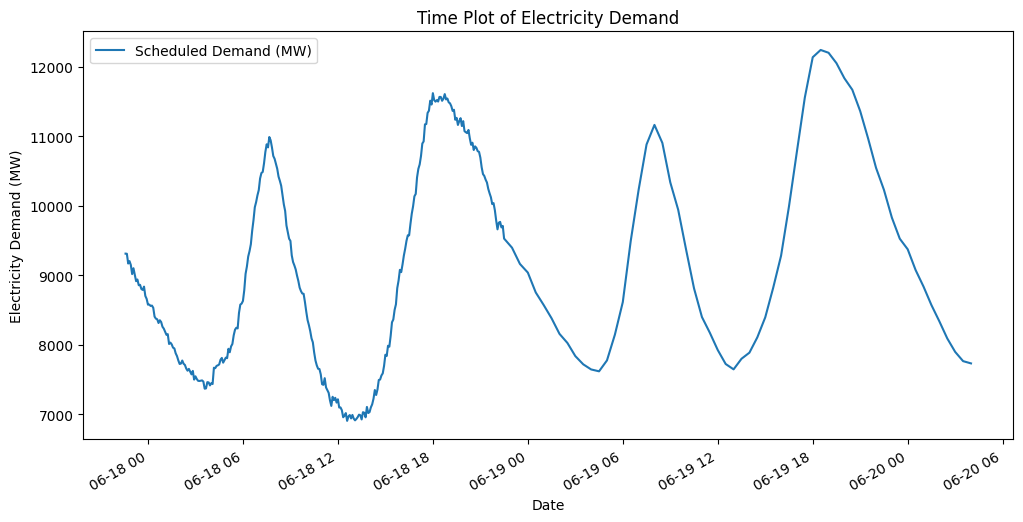

In [6]:
import matplotlib.pyplot as plt

elec_demand.plot(x = 'Settlement Date', 
                 y = 'Scheduled Demand (MW)', 
                 figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Time Plot of Electricity Demand')
plt.show()

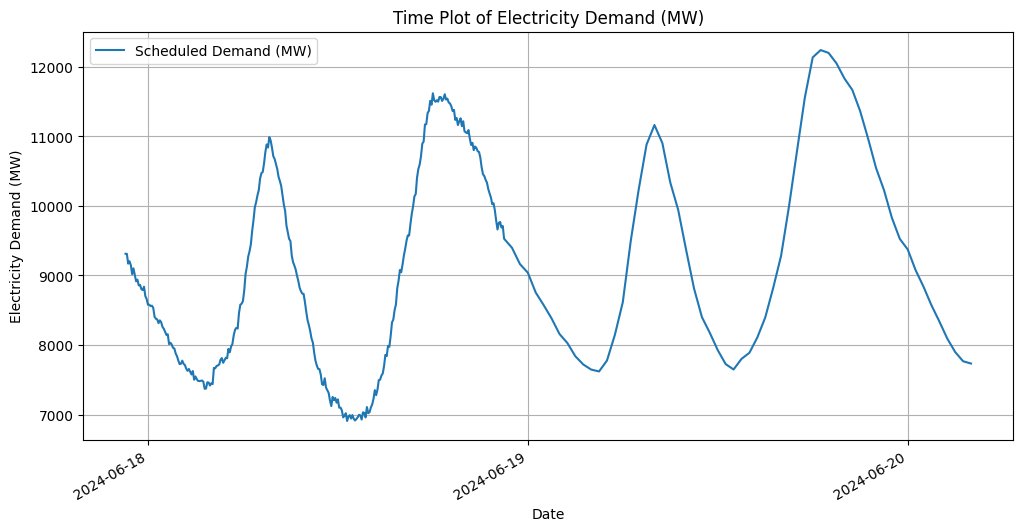

In [9]:
import matplotlib.pyplot as plt

elec_demand.plot(x = 'Settlement Date', 
                 y = 'Scheduled Demand (MW)', 
                 figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Time Plot of Electricity Demand (MW)')
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
plt.show()

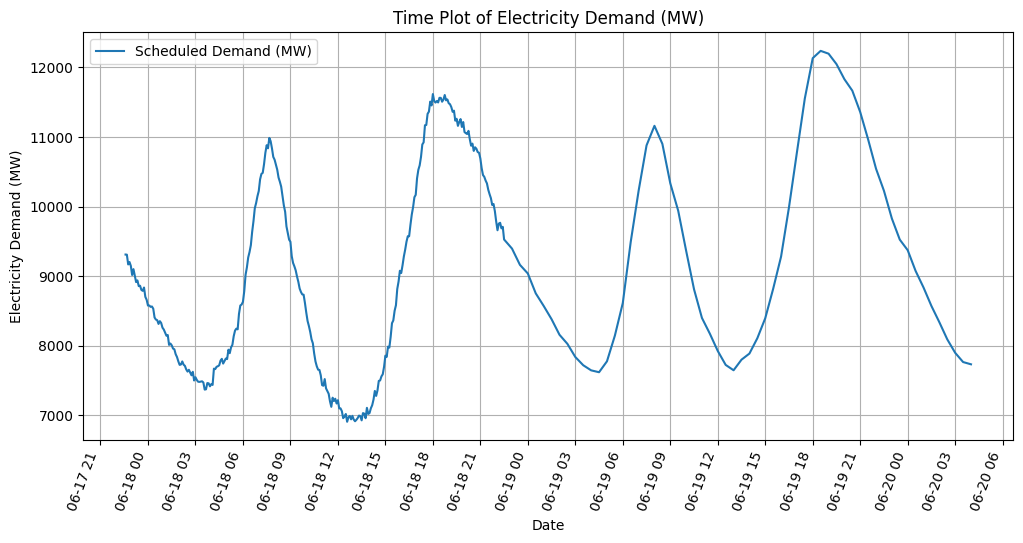

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
elec_demand.plot(x='Settlement Date', 
                 y='Scheduled Demand (MW)', 
                 ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Demand (MW)')
ax.set_title('Time Plot of Electricity Demand (MW)')
ax.grid(True)
ax.xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=3))
fig.autofmt_xdate(rotation=70)
plt.show()


Based on the time plot of electricity demand, we can observe the following:

- **Pattern**: The electricity demand shows a clear daily pattern with peaks and troughs, indicating higher demand during certain times of the day.
- **Trends**: There is a noticeable trend in the data, with demand generally increasing or decreasing over the observed period. (Next we will explore this)
- **Unusual Observations**: It seems there is no unusulas observations.
- **Seasonal Variations**: The plot may also reveal seasonal variations, such as higher demand during specific hour from a day.
---

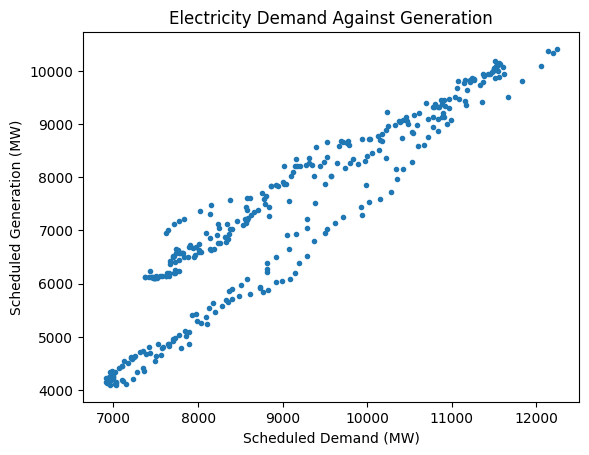

In [19]:
plt.scatter(data = elec_demand, 
            x = "Scheduled Demand (MW)", 
            y = "Scheduled Generation (MW)",
            marker = ".")

plt.xlabel("Scheduled Demand (MW)")
plt.ylabel("Scheduled Generation (MW)")
plt.title("Electricity Demand Against Generation")
plt.show()

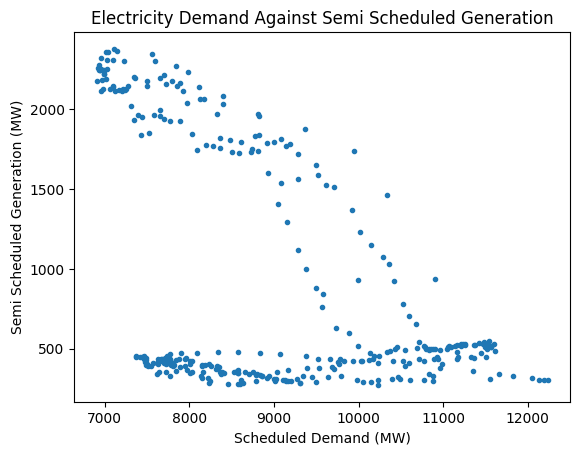

In [21]:
plt.scatter(data = elec_demand, 
            x = "Scheduled Demand (MW)", 
            y = "Semi Scheduled Generation (MW)",
            marker = ".")

plt.xlabel("Scheduled Demand (MW)")
plt.ylabel("Semi Scheduled Generation (MW)")
plt.title("Electricity Demand Against Semi Scheduled Generation")
plt.show()

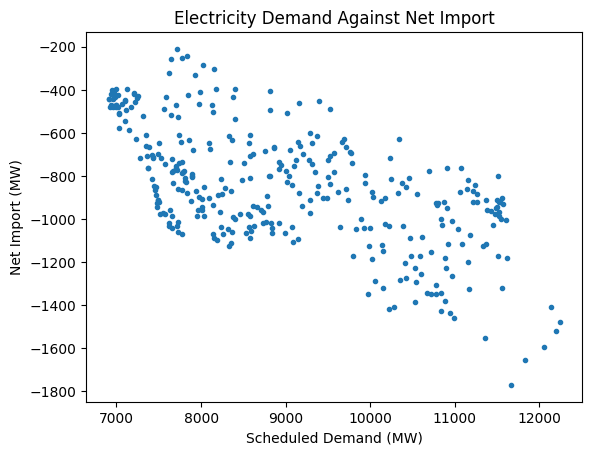

In [22]:
plt.scatter(data = elec_demand, 
            x = "Scheduled Demand (MW)", 
            y = "Net Import (MW)",
            marker = ".")

plt.xlabel("Scheduled Demand (MW)")
plt.ylabel("Net Import (MW)")
plt.title("Electricity Demand Against Net Import")
plt.show()

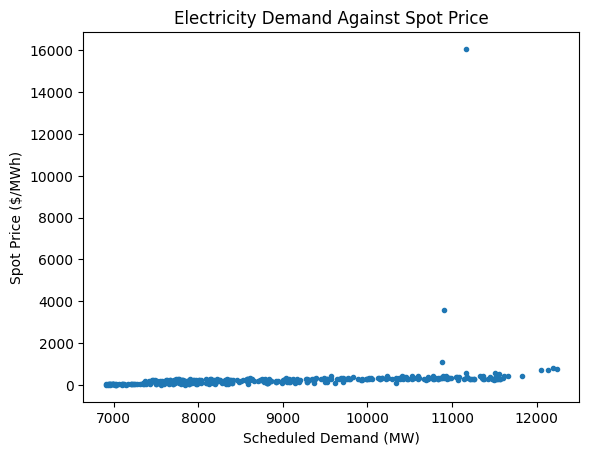

In [23]:
plt.scatter(data = elec_demand, 
            x = "Scheduled Demand (MW)", 
            y = "Spot Price ($/MWh)",
            marker = ".")

plt.xlabel("Scheduled Demand (MW)")
plt.ylabel("Spot Price ($/MWh)")
plt.title("Electricity Demand Against Spot Price")
plt.show()

- Scheduled Demand (MW) & Scheduled Generation (MW) : Almost linear
- Scheduled Demand (MW) & Semi Scheduled Generation (MW) : Not linear
- Scheduled Demand (MW) & Net Import (MW) : Not linear
- Scheduled Demand (MW) & Spot Price ($/MWh) : Not linear